# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!


# Analiza. Ale w zasadzie czego?

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [20]:
import pandas as pd
from itables import show
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Przykładowe wiersze naszych danych

In [21]:
df = pd.read_csv('25__iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Statystyka opisowa


In [22]:
df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Wartości unikatowe oraz brakujące

In [23]:
print("Ilość wartości unikatowych:")
uniqe_counts = df.nunique()
print(uniqe_counts)
print("\n")  # Dodanie przerwy między wierszami
print("Ilość komórek z brakującymi wartościami:")
print(df.isnull().sum())

Ilość wartości unikatowych:
długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64


Ilość komórek z brakującymi wartościami:
długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64


# Wszystkie dane kompletne

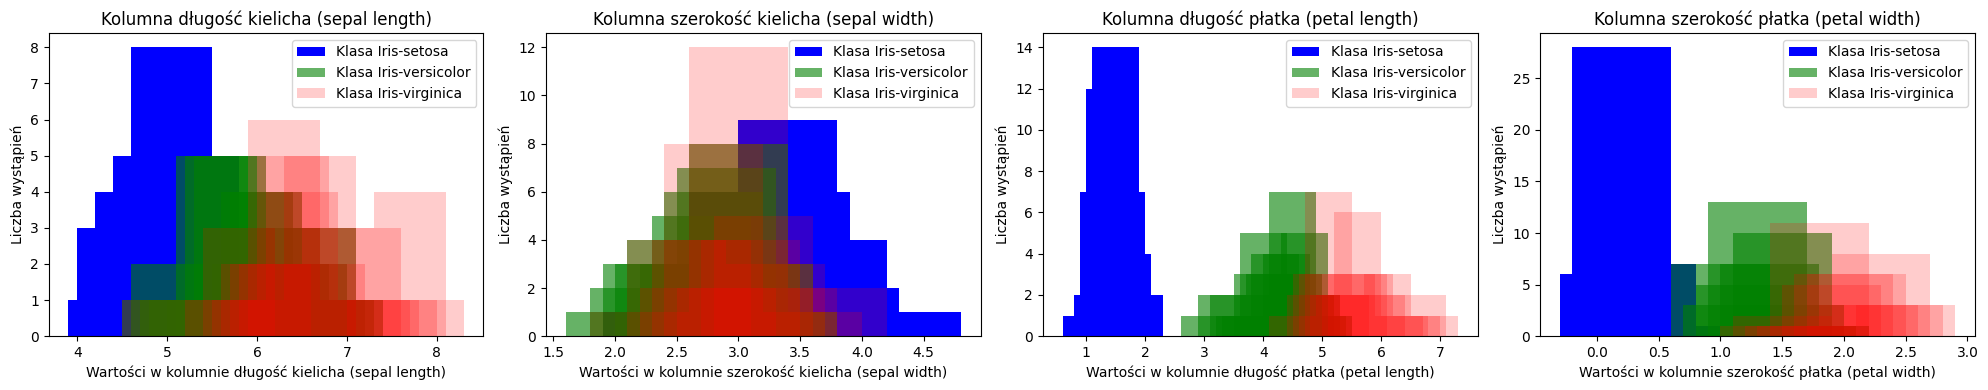

In [24]:
classes = df['klasa (class)'].unique()
columns = [col for col in df.columns if col != 'klasa (class)']

# Słownik przypisujący kolory do klas
class_colors = {class_value: color for class_value, color in zip(classes, ['blue', 'green', 'red'])}

# Tworzenie subwykresów w jednym rzędzie (np. dla pierwszych 4 kolumn)
fig, axes = plt.subplots(1, len(columns[:4]), figsize=(5 * len(columns[:4]), 4))

# Pętla przez kolumny (ograniczenie do pierwszych 4)
for ax, column_value in zip(axes, columns[:4]):
    initial_alpha = 1.0
    alpha_decrement = 0.4

    for i, class_value in enumerate(classes):
        filtered_df = df[df['klasa (class)'] == class_value]
        data_counts = filtered_df[column_value].value_counts()

        current_alpha = max(0, initial_alpha - i * alpha_decrement)
        ax.bar(data_counts.index, data_counts.values,
               alpha=current_alpha,
               color=class_colors[class_value],
               label=f"Klasa {class_value}")
    
    # Etykiety i tytuły dla każdej osi
    ax.set_xlabel(f"Wartości w kolumnie {column_value}")
    ax.set_ylabel("Liczba wystąpień")
    ax.set_title(f"Kolumna {column_value}")
    ax.legend()

# Dopasowanie układu
plt.tight_layout()
plt.show()

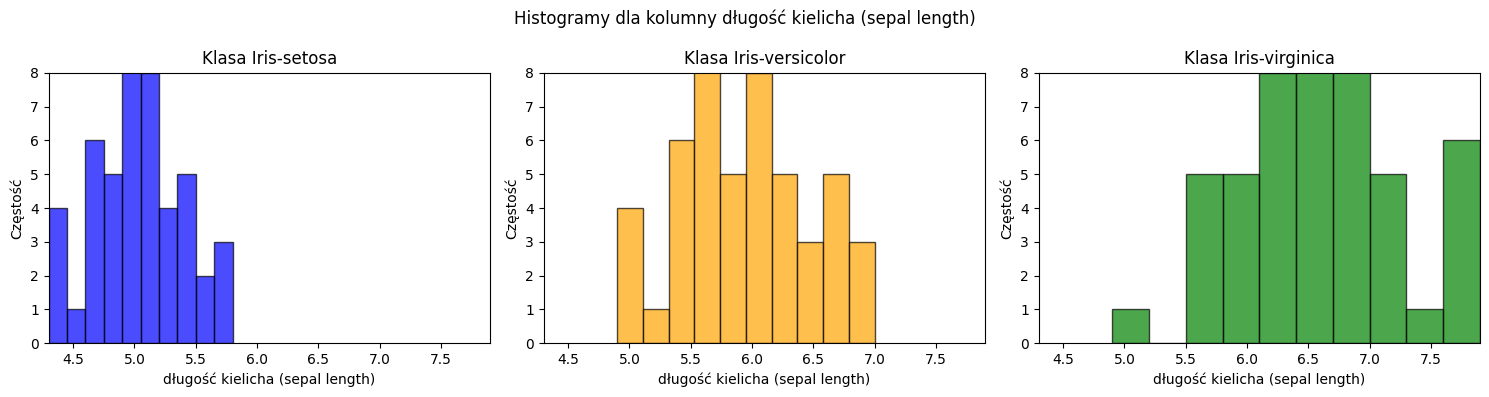

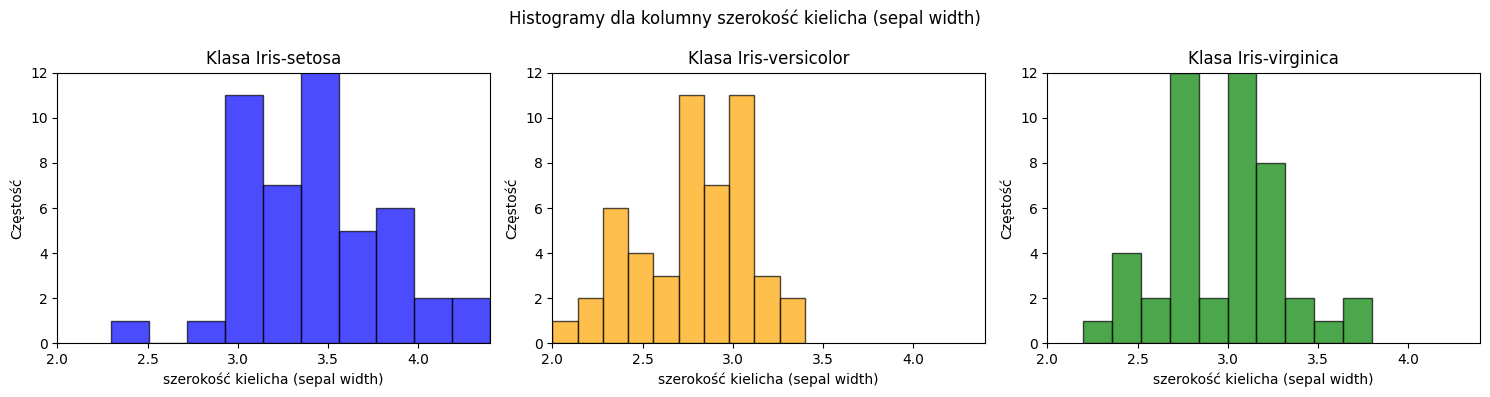

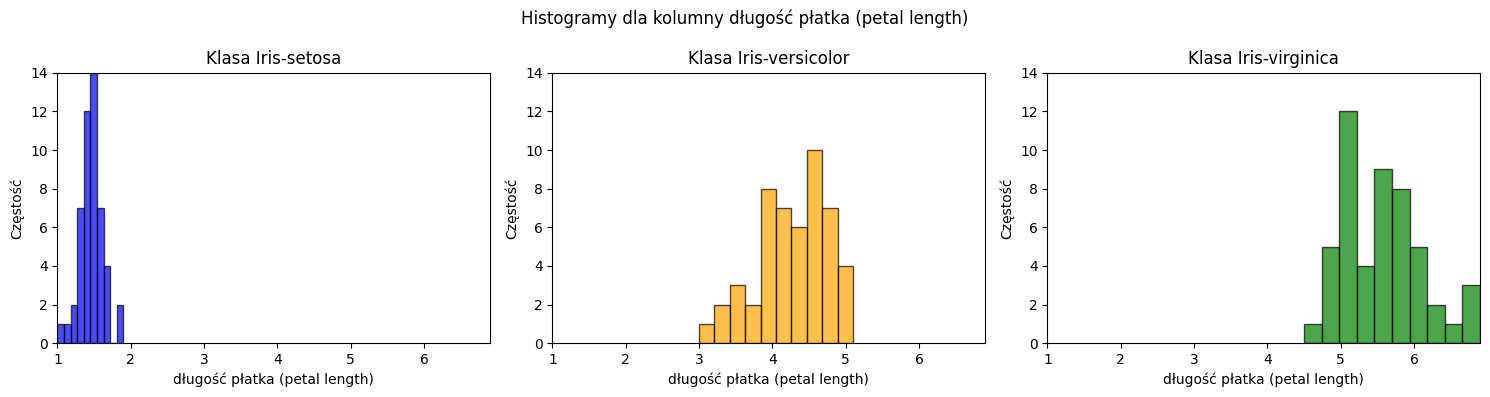

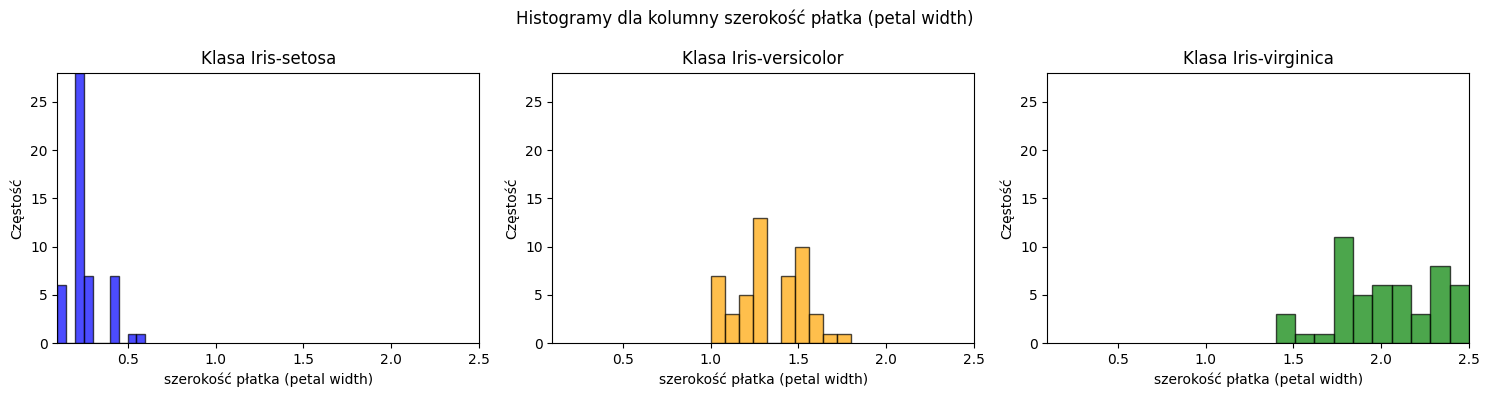

In [25]:
# Pobranie unikalnych klas z kolumny 'klasa (class)'
classes = df['klasa (class)'].unique()

# Definicja kolorów dla klas
colors = {
    f'{classes[0]}': 'blue',
    f'{classes[1]}': 'orange',
    f'{classes[2]}': 'green'
}

# Tworzenie histogramów z identycznym zakresem osi dla każdej kolumny
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Obliczanie globalnych zakresów osi X i Y dla danej kolumny
    x_min, x_max = df[column].min(), df[column].max()
    y_max = 0

    # Obliczanie maksymalnej wysokości (częstości) histogramu dla tej kolumny
    for class_value in classes:
        filtered_df = df[df['klasa (class)'] == class_value]
        y_max = max(y_max, filtered_df[column].value_counts().max())

    # Tworzenie wykresów dla tej kolumny
    fig, axes = plt.subplots(1, len(classes), figsize=(5 * len(classes), 4))
    fig.suptitle(f'Histogramy dla kolumny {column}')

    for ax, class_value in zip(axes, classes):
        subset = df[df['klasa (class)'] == class_value]
        ax.hist(subset[column], bins=10, alpha=0.7, color=colors.get(class_value), edgecolor='black')
        ax.set_title(f'Klasa {class_value}')
        ax.set_xlabel(column)
        ax.set_ylabel('Częstość')

        # Ustawienie identycznych zakresów osi
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(0, y_max)

    plt.tight_layout()
    plt.show()

In [26]:
def get_y_max(df, column, classes):
    y_max = 0
    for class_value in classes:
        filtered_df = df[df['klasa (class)'] == class_value]
        y_max = max(y_max, filtered_df[column].value_counts().max())
    return y_max

In [27]:
def plot_histograms_for_column(df, column, classes, colors):
    x_min, x_max = df[column].min(), df[column].max()
    y_max = get_y_max(df, column, classes)

    fig, axes = plt.subplots(1, len(classes), figsize=(5 * len(classes), 4))
    fig.suptitle(f'Histogramy dla kolumny {column}')

    for ax, class_value in zip(axes, classes):
        subset = df[df['klasa (class)'] == class_value]
        ax.hist(subset[column], bins=10, alpha=0.7, color=colors.get(class_value), edgecolor='black')
        ax.set_title(f'Klasa {class_value}')
        ax.set_xlabel(column)
        ax.set_ylabel('Częstość')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(0, y_max)

    plt.tight_layout()
    plt.show()

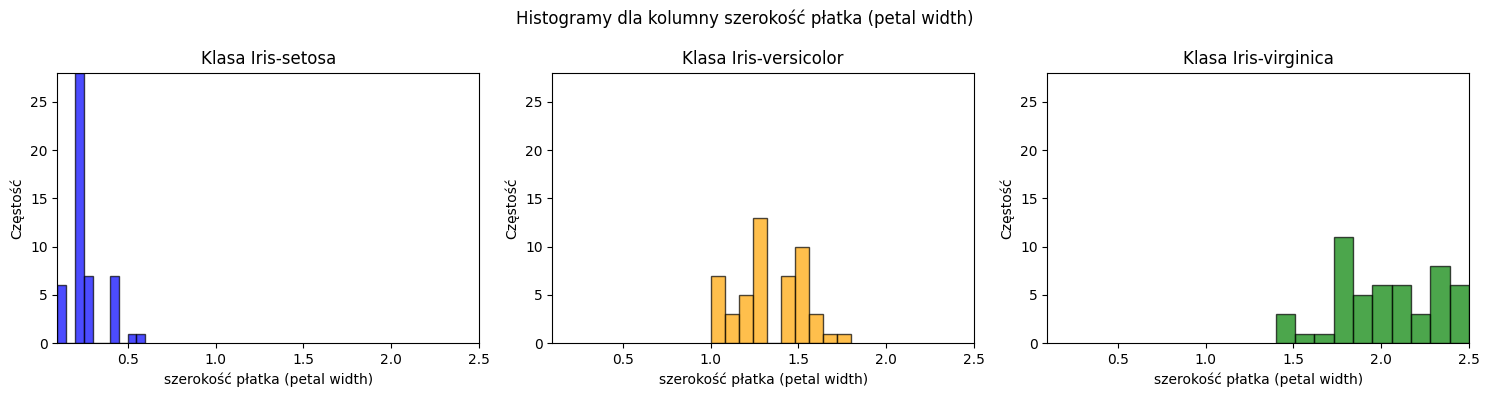

In [32]:
# Pobranie unikalnych klas z kolumny 'klasa (class)'
classes = df['klasa (class)'].unique()
column_names = df.columns.tolist()
# Definicja kolorów dla klas
colors = {f'{classes[i]}': color for i, color in enumerate(['blue', 'orange', 'green'])}

selected_column = column_names[0]
plot_histograms_for_column(df, column, classes, colors)

# Iteracja po kolumnach i wywołanie funkcji dla każdej z nich
#for column in df.select_dtypes(include=['int64', 'float64']).columns:
#    plot_histograms_for_column(df, column, classes, colors)

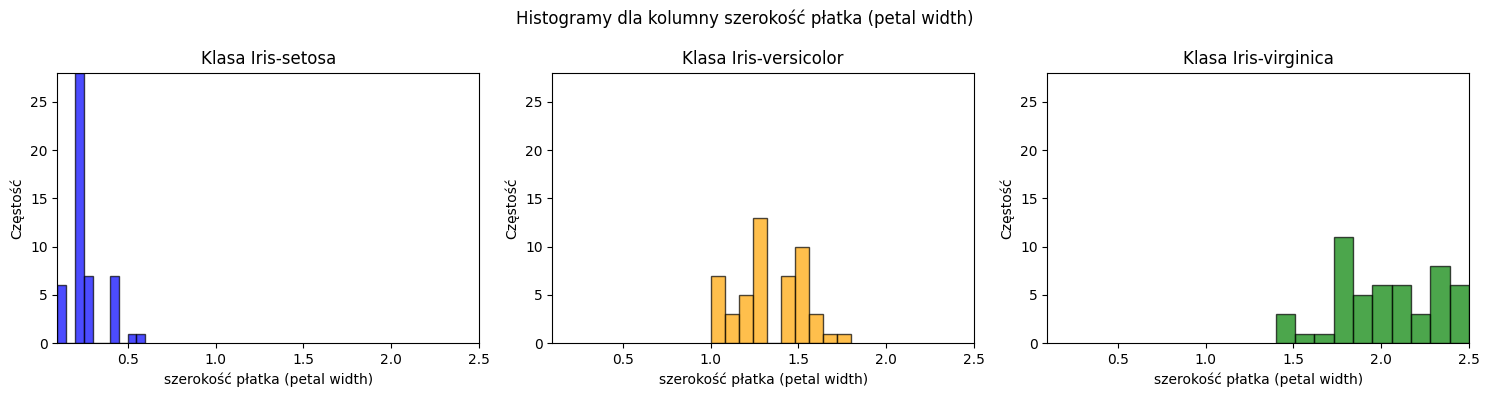

In [33]:
# Pobranie unikalnych klas z kolumny 'klasa (class)'
classes = df['klasa (class)'].unique()

# Definicja kolorów dla klas
colors = {f'{classes[i]}': color for i, color in enumerate(['blue', 'orange', 'green'])}

selected_column = column_names[1]
plot_histograms_for_column(df, column, classes, colors)

# Iteracja po kolumnach i wywołanie funkcji dla każdej z nich
#for column in df.select_dtypes(include=['int64', 'float64']).columns:
#    plot_histograms_for_column(df, column, classes, colors)

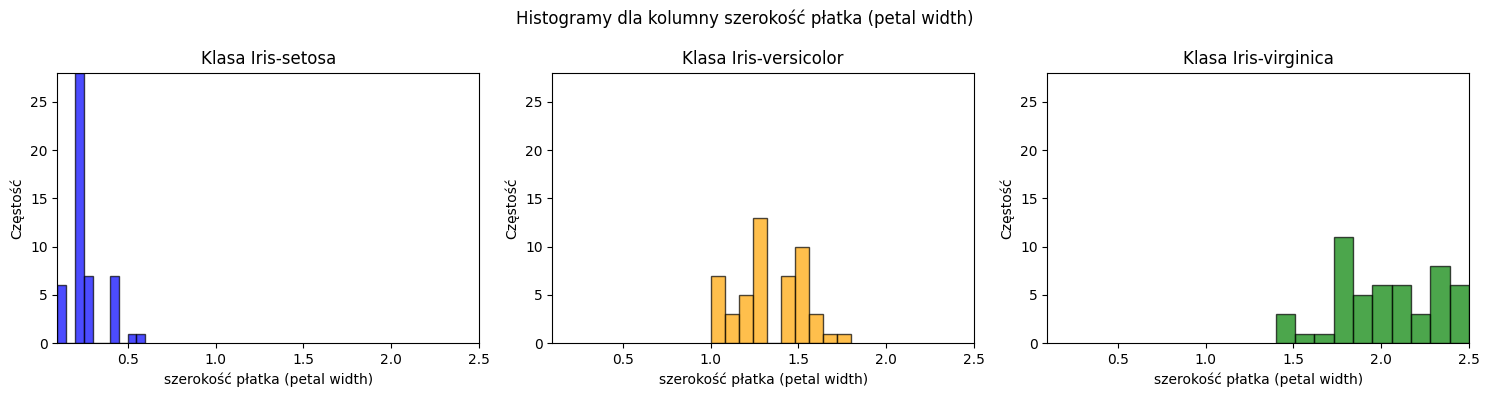

In [30]:
# Pobranie unikalnych klas z kolumny 'klasa (class)'
classes = df['klasa (class)'].unique()

# Definicja kolorów dla klas
colors = {f'{classes[i]}': color for i, color in enumerate(['blue', 'orange', 'green'])}

selected_column = classes[2]
plot_histograms_for_column(df, column, classes, colors)

# Iteracja po kolumnach i wywołanie funkcji dla każdej z nich
#for column in df.select_dtypes(include=['int64', 'float64']).columns:
#    plot_histograms_for_column(df, column, classes, colors)

In [ ]:
# Pobranie unikalnych klas z kolumny 'klasa (class)'
classes = df['klasa (class)'].unique()

# Definicja kolorów dla klas
colors = {f'{classes[i]}': color for i, color in enumerate(['blue', 'orange', 'green'])}

selected_column = classes[3``]
plot_histograms_for_column(df, column, classes, colors)

# Iteracja po kolumnach i wywołanie funkcji dla każdej z nich
#for column in df.select_dtypes(include=['int64', 'float64']).columns:
#    plot_histograms_for_column(df, column, classes, colors)

IndexError: index 3 is out of bounds for axis 0 with size 3

# W każdym z parametrów da się zauważyć rozkład naturnalnny. Irys-Setosa znacznie różni się od pozostałych dwóch. Różnice pomiędzy Iris-versicolor a Iris-virginica są mniejsze ale zauważalne.

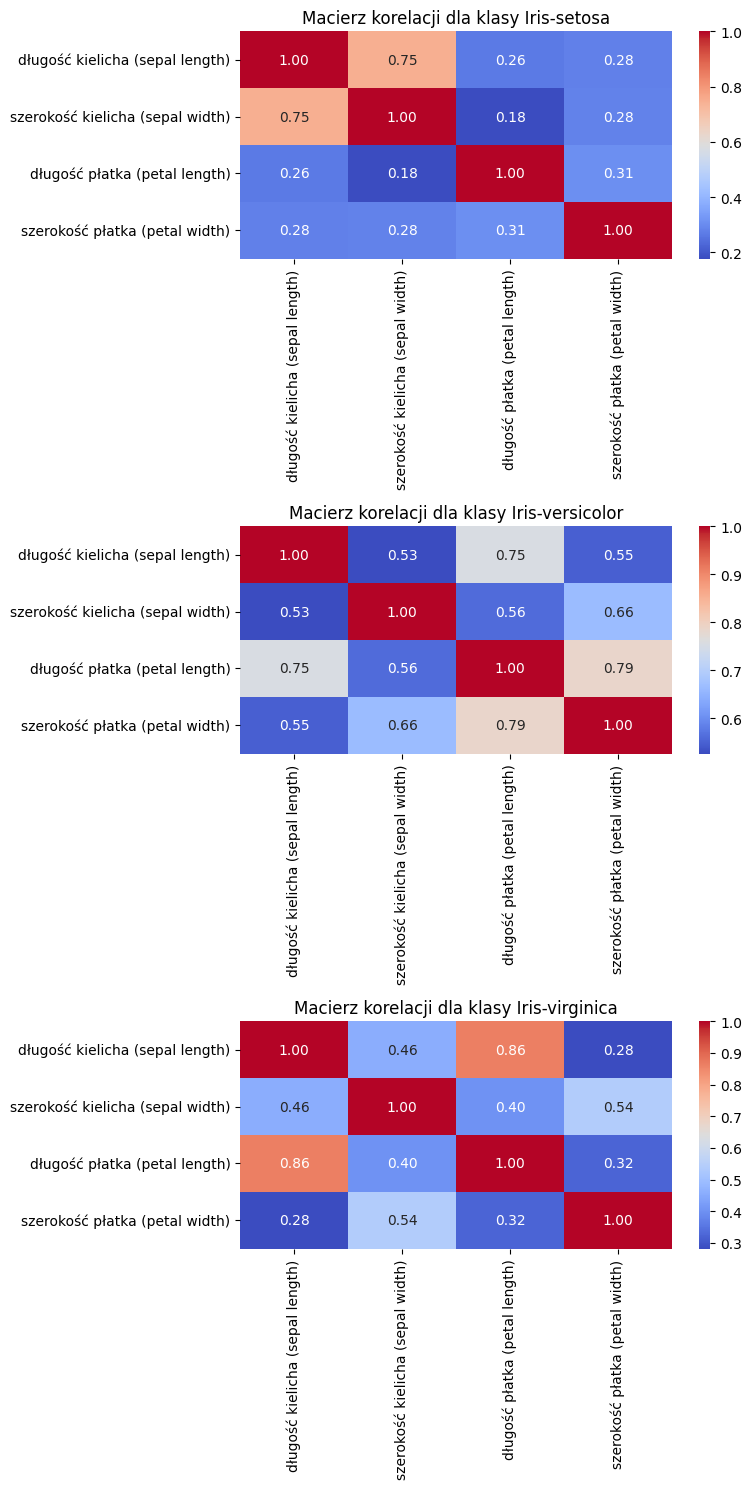

In [ ]:
classes = df['klasa (class)'].unique()
columns = [col for col in df.columns if col != 'klasa (class)']

# Tworzenie macierzy korelacji dla każdej klasy
fig, axes = plt.subplots(len(classes), 1, figsize=(8, 5 * len(classes)))

if len(classes) == 1:
    axes = [axes]  # Zapewnienie, że axes zawsze jest listą

for ax, class_value in zip(axes, classes):
    filtered_df = df[df['klasa (class)'] == class_value][columns]  # Filtrowanie danych dla klasy
    correlation_matrix = filtered_df.corr()  # Obliczenie macierzy korelacji

    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)  # Wizualizacja macierzy
    ax.set_title(f"Macierz korelacji dla klasy {class_value}")

plt.tight_layout()
plt.show()


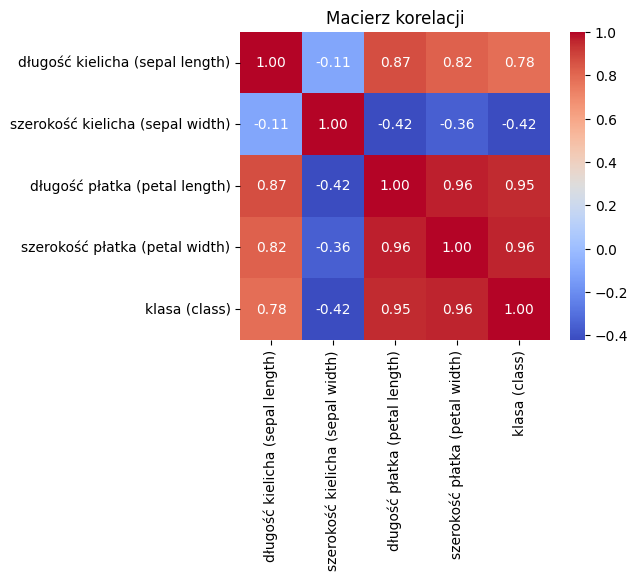

In [ ]:
corr_df = df.copy()
corr_df['klasa (class)'] = pd.factorize(corr_df['klasa (class)'])[0]

# Obliczanie macierzy korelacji
correlation_matrix = corr_df.corr()

plt.figure(figsize=(5, 4)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,            
    fmt=".2f",             
    cmap="coolwarm",       
    cbar=True,             
    xticklabels=correlation_matrix.columns, 
    yticklabels=correlation_matrix.columns
)
plt.title("Macierz korelacji");

# Szerokość oraz długość płatka korelują z gatunkiem kwiatu z którego pochodzą. Zależność pomiędzy nimi również jest mocna. Szerokość płatka nie jest zależna z żadnym innym parametrem.

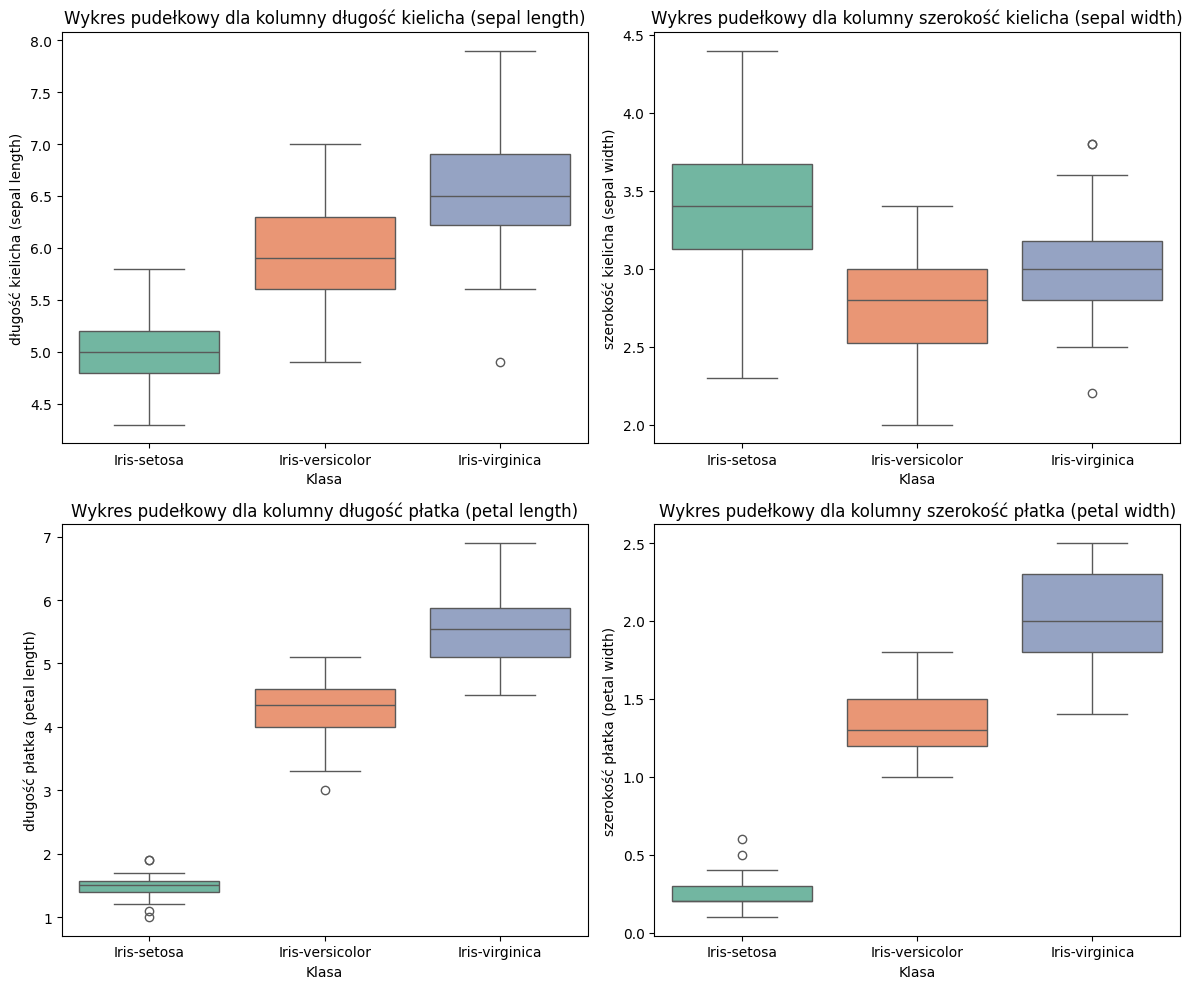

In [ ]:
columns = [col for col in df.columns if col != 'klasa (class)']

rows = (len(columns) + 1) // 2 
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()
for ax, column_value in zip(axes, columns):
    sns.boxplot(x=df["klasa (class)"], y=df[column_value], ax=ax, hue=df["klasa (class)"], palette="Set2", legend=False)
    ax.set_title(f"Wykres pudełkowy dla kolumny {column_value}")
    ax.set_xlabel("Klasa")
    ax.set_ylabel(column_value)

plt.tight_layout()
plt.show()

## Do określania gatunku wystarczy zmierzyć parametry płatka danego kwiatu. Większość pomiarów płatków mieści się w wąskich zakresach co z reguły pozwala precyzyjnie określić gatunek z którego pochodzą.
## Iris-setosa ma je najmniejsze, następnie Irys-versicolor. Największe płatki posiada Iris-virginica.
## Rozmiar kielicha nie jest już tak charakterystyczny dla danej odmiany. 
## Zarówno szerokość jak i długość kielicha mają duże zróżnicowanie co dodatkowo może utrudniać rozpoznanie.

In [ ]:
# genetowanie do raportu html pod PDF
!jupyter nbconvert Mod-4-zad-1-kopia.ipynb --to html --no-input --no-prompt --output Mod-4-zad-1-html.html

[NbConvertApp] Converting notebook Mod-4-zad-1-kopia.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 751199 bytes to Mod-4-zad-1-html.html


In [ ]:
# Generowanie do slajdów prezentacji
!jupyter nbconvert Mod-4-zad-1-kopia.ipynb --to slides --no-input --no-prompt --output Mod-4-zad-1

[NbConvertApp] Converting notebook Mod-4-zad-1-kopia.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 582024 bytes to Mod-4-zad-1.slides.html
